In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
def standard_units(x):
    return (x - np.average(x))/np.std(x)

def correlation(t, x, y):
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.average(x_su * y_su)

# Graph of Averages

In [3]:
plant_height = Table.read_table('Plant_height.csv')
plant_height

sort_number,site,Genus_species,Family,growthform,height,loght,Country,Site,lat,long,entered.by,alt,temp,diurn.temp,isotherm,temp.seas,temp.max.warm,temp.min.cold,temp.ann.range,temp.mean.wetqr,temp.mean.dryqr,temp.mean.warmqr,temp.mean.coldqr,rain,rain.wetm,rain.drym,rain.seas,rain.wetqr,rain.dryqr,rain.warmqr,rain.coldqr,LAI,NPP,hemisphere
1402,193,Acer_macryophyllum,Sapindaceae,Tree,28,1.44716,USA,Oregon - McDun,44.6,-123.334,Angela,179,10.8,11.8,4.4,5.2,27,0.3,26.7,4.9,17.4,17.6,4.5,1208,217,13,69,601,68,75,560,2.51,572,1
25246,103,Quararibea_cordata,Malvaceae,Tree,26.6,1.42488,Peru,Manu,12.183,-70.55,Angela,386,24.5,10.8,7.4,0.9,31.2,16.7,14.5,25.1,23.2,25.3,23.1,3015,416,99,45,1177,340,928,359,4.26,1405,-1
11648,54,Eragrostis_dielsii,Poaceae,Herb,0.3,-0.522879,Australia,Central Australia,23.8,133.833,Michelle,553,20.9,16.3,4.8,6,37,3.6,33.4,28.1,14.8,28.1,12.8,278,37,9,42,109,35,109,42,1.32,756,-1
8168,144,Cistus_salvifolius,Cistaceae,Shrub,1.6,0.20412,Israel,Hanadiv,32.555,34.938,Angela,115,19.9,9.7,4.4,4.9,30.7,8.7,22,13.6,25.3,25.7,13.6,598,159,0,115,408,0,2,408,1.01,359,1
22422,178,Phlox_bifida,Polemoniaceae,Herb,0.2,-0.69897,USA,Indiana Dunes,41.617,-86.95,Michelle,200,9.7,10.7,2.8,9.7,28.6,-9.5,38.1,21.6,-3.3,21.6,-3.3,976,104,44,23,299,165,299,165,3.26,1131,1
15925,59,Homalium_betulifolium,Salicaceae,Shrub,1.7,0.230449,New Caledonia,nan,21.5,165.5,Laura,95,22.6,7.4,5.4,2.2,29,15.5,13.5,25.4,20.4,25.4,19.7,1387,216,59,46,600,186,600,212,6.99,1552,-1
25151,27,Pultenaea_microphylla,Fabaceae - P,Shrub,0.5,-0.30103,Australia,"Kuringai Chase, Sydney",33.65,151.2,Michelle,157,16.8,10,4.8,3.9,26.1,5.5,20.6,21.2,12.3,21.4,11.5,1283,157,63,29,450,208,385,279,4.14,1563,-1
26007,118,Rhizophora_mucronata,Rhizophoraceae,Tree,10,1,nan,Marshall Islands,9,168,Laura,2,27.7,4.8,8.8,0.2,30.6,25.2,5.4,27.9,27.5,27.9,27.5,2585,300,82,34,870,305,855,405,nan,nan,1
6597,154,Carya_ovata,Juglandaceae,Tree,40,1.60206,USA,Colorado,35.8,-89.9,Angela,71,15.5,11.4,3.2,8.6,32.9,-2.6,35.5,15.6,21.5,26.1,3.8,1262,129,66,18,382,249,268,325,3.14,1266,1
16908,106,Ischaemum_nativitatis,Poaceae,Herb,0.5,-0.30103,Australia,Christmas Island,10.417,105.667,Laura,2,26.4,5,7.4,0.6,29.9,23.2,6.7,26.8,25.7,27.1,25.5,1704,309,16,66,806,92,659,135,4.51,2296,-1


In [4]:
## select the columns we want 
p_h = plant_height.select('temp', 'loght')
p_h

temp,loght
10.8,1.44716
24.5,1.42488
20.9,-0.522879
19.9,0.20412
9.7,-0.69897
22.6,0.230449
16.8,-0.30103
27.7,1
15.5,1.60206
26.4,-0.30103


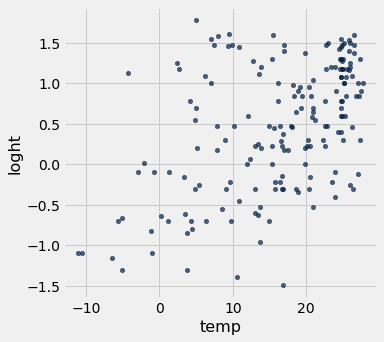

In [5]:
p_h.scatter('temp')

In [6]:
correlation(p_h, 'temp', 'loght')

0.4962426104103495

In [19]:
def predict_height(x):
    section = p_h.where('temp', are.between(x-7, x+7))
    return np.average(section.column("loght"))

In [20]:
predictions = p_h.apply(predict_height, 'temp')
predictions

array([ 0.30530301,  0.7710773 ,  0.67320203,  0.61129443,  0.27606151,
        0.68590021,  0.38145355,  0.87090951,  0.32075383,  0.80825253,
        0.19620918,  0.78468664,  0.59653584,  0.82663702,  0.77768826,
        0.32100998,  0.63459083,  0.77768826,  0.70253852,  0.36348944,
        0.80870018,  0.19109597,  0.79606806,  0.61129443,  0.77768826,
        0.80778613,  0.78106542,  0.78165   ,  0.80690336,  0.52375373,
        0.7710773 ,  0.68720428,  0.33821703,  0.36487408,  0.5379056 ,
       -0.69656651,  0.33906272,  0.2041482 ,  0.64676739,  0.36487408,
        0.80778613,  0.70035   , -0.05618278,  0.79606806,  0.78165   ,
        0.77768826,  0.36278577,  0.80870018,  0.33395849,  0.79606806,
        0.83368142,  0.77473051,  0.18705057, -0.59293065,  0.18705057,
        0.36278577,  0.14809105,  0.38649812,  0.78468664,  0.33821703,
        0.77768826,  0.77768826,  0.46615985,  0.35715249,  0.80690336,
        0.38329388, -0.55950294,  0.68590021,  0.77768826,  0.69

In [21]:
p_h = p_h.with_column(
        'graph of average prediction', predictions
)
p_h

temp,loght,graph of average prediction
10.8,1.44716,0.305303
24.5,1.42488,0.771077
20.9,-0.522879,0.673202
19.9,0.20412,0.611294
9.7,-0.69897,0.276062
22.6,0.230449,0.6859
16.8,-0.30103,0.381454
27.7,1,0.87091
15.5,1.60206,0.320754
26.4,-0.30103,0.808253


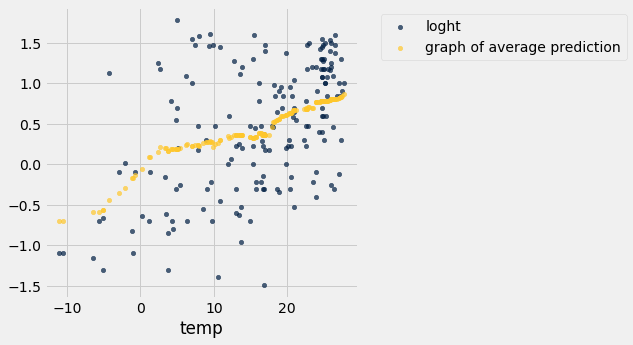

In [22]:
p_h.scatter('temp')

# Linear Prediction

In [23]:
## Estimate the y (dependent value) based on some given x value 

In [24]:
## convert the given x to standard units
su_x = standard_units(p_h.column("temp"))
su_x

array([-0.58028614,  0.91257786,  0.52029243,  0.41132425, -0.70015114,
        0.70553833,  0.07352291,  1.26127602, -0.06813572,  1.11961739,
       -1.16871429,  0.98885558,  0.34594335,  1.20679193,  0.94526831,
       -0.08992935,  0.47670516,  0.95616513,  0.80360968, -0.25338162,
        1.07603012, -1.21230156,  1.05423649,  0.41132425,  0.95616513,
        1.16320466,  0.96706195,  1.01064922,  1.10872057,  0.22607835,
        0.86899059,  0.67284787, -0.04634208, -0.34055616,  0.23697517,
       -2.96668918, -0.13351662, -1.38665064,  0.49849879, -0.34055616,
        1.13051421,  0.79271287, -1.7353488 ,  1.0651333 ,  1.02154603,
        0.92347468,  0.09531654,  1.07603012, -0.0572389 ,  1.0651333 ,
        1.21768875,  0.84719695, -1.2994761 , -2.37826104, -1.23409519,
        0.09531654, -1.49561882,  0.008142  ,  0.98885558, -0.04634208,
        0.95616513,  0.92347468,  0.1933879 , -0.26427843,  1.09782376,
        0.04083246, -2.31288013,  0.71643514,  0.94526831,  0.69

In [25]:
su_y = standard_units(p_h.column("loght"))
su_y

array([ 1.26077299,  1.23237201, -1.25089813, -0.32402116, -1.47540324,
       -0.29045345, -0.96805514,  0.69067505,  1.4582631 , -0.96805514,
       -0.9152821 ,  1.33470902,  0.30688102,  0.49318494,  0.79162608,
       -0.29700616, -0.78175122,  0.18332694, -0.8671041 , -0.32402116,
        1.33470902,  1.69192045,  0.90774787, -0.58426111,  0.91518016,
        0.49318494,  1.07446908,  0.49318494,  0.00526682,  0.67209474,
        0.56712097, -0.20046708, -0.8671041 , -0.29045345,  0.49318494,
       -1.98275135, -1.47540324, -0.77624174,  0.49318494, -0.96805514,
        1.16376289,  0.950915  , -1.39084192,  1.36827674,  0.91518016,
        0.91518016, -0.359756  ,  0.950915  , -0.01416317,  1.19802316,
        1.07446908, -1.09160922,  0.40783206, -1.47540324,  0.10939091,
        1.19802316,  1.0161312 ,  0.69067505,  0.69067505, -0.96805514,
        1.0460681 ,  1.07446908,  0.02403803, -1.80642424,  0.81422913,
       -0.8671041 , -2.24299129,  1.29897419,  1.38432707,  0.02

In [26]:
r = np.average(su_x * su_y)
r

0.4962426104103495

In [27]:
## y = r * x 
su_p_h = Table().with_columns(
    'temp (su)', su_x,
    'log Height (su)', su_y,
    'standard unit regression prediction', r * su_x
)
su_p_h

temp (su),log Height (su),standard unit regression prediction
-0.580286,1.26077,-0.287963
0.912578,1.23237,0.45286
0.520292,-1.2509,0.258191
0.411324,-0.324021,0.204117
-0.700151,-1.4754,-0.347445
0.705538,-0.290453,0.350118
0.0735229,-0.968055,0.0364852
1.26128,0.690675,0.625899
-0.0681357,1.45826,-0.0338118
1.11962,-0.968055,0.555602


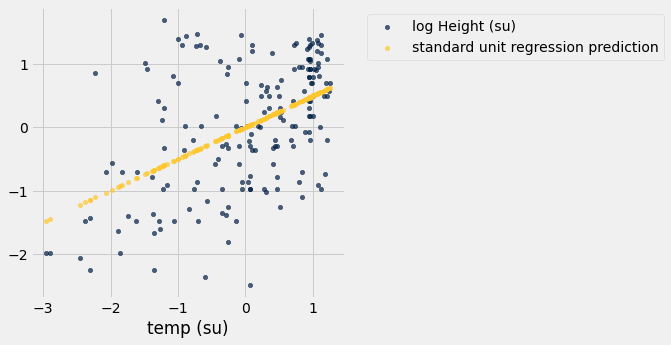

In [28]:
su_p_h.scatter(0)

# Regression Line

In [29]:
def slope(t, x, y):
    r = correlation(t, x, y)
    ## r * sd of y / sd of x
    return r * np.std(t.column(y)) / np.std(t.column(x))


def intercept(t, x, y):
    a = slope(t, x, y)
    ## avg of y - slope * avg of x 
    return np.average(t.column(y)) - a * np.average(t.column(x))

In [30]:
ph_slope = slope(p_h, 'temp', 'loght')
ph_intercept = intercept(p_h, 'temp', 'loght')
(ph_slope, ph_intercept)

(0.0424136152843201, -0.22566450772799984)

In [32]:
p_h.take(45)

temp,loght,graph of average prediction
24.6,1.17609,0.777688


In [33]:
ph_slope * 24.6 + ph_intercept

0.8177104282662747

In [34]:
def fitted_values(t, x, y):
    m = slope(t, x, y)
    b = intercept(t, x, y)
    return m * t.column(x) + b

In [35]:
p_h = p_h.with_column(
    'Original Unit Regression Prediction', fitted_values(p_h, 'temp', 'loght'))
p_h

temp,loght,graph of average prediction,Original Unit Regression Prediction
10.8,1.44716,0.305303,0.232403
24.5,1.42488,0.771077,0.813469
20.9,-0.522879,0.673202,0.66078
19.9,0.20412,0.611294,0.618366
9.7,-0.69897,0.276062,0.185748
22.6,0.230449,0.6859,0.732883
16.8,-0.30103,0.381454,0.486884
27.7,1,0.87091,0.949193
15.5,1.60206,0.320754,0.431747
26.4,-0.30103,0.808253,0.894055


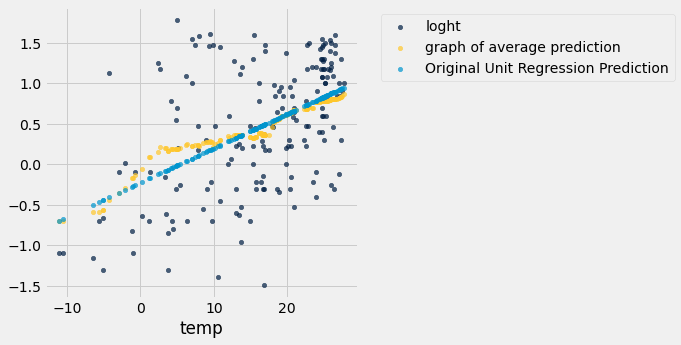

In [36]:
p_h.scatter('temp')